### 1 Clase de Ejercicios
#### 1.1 Problema 1
La segmentación de clientes corresponde a agrupar clientes con características similares. Estas características pueden incluír ubicación geográfica, estilos de vida, comportamientos, etc. Uno de los objetivos más conocidos de esta tarea corresponde a la selección de un grupo objetivo para la aplicación de alguna campaña de publicidad.
La base de datos Mall-customer-data.csv contiene información de clientes que han realizado compras en una tienda de un centro comercial. Cada muestra del conjunto de datos contiene: 
- ID.
- Edad. 
- Género. 
- Ingresos anuales. 
- Puntuación de gasto.

Se busca determinar cuales son los grupos de clientes que realizan compras. Para esto:
1. Realice un análisis exploratorio del conjunto de datos. Se recomienda: Cantidad de muestras según rango etareo/género, género v/s puntuación de gasto, edad v/s ingreso anual, etc. 
2. Entrene un modelode KMeans en las tres columnas de datos continuos que considere más relevantes. Justifique el número de clusters que eligió. 
3. Grafique en 3D los clústers encontrados específicando en cada uno la ubicación del centroide. 
4. ¿Es correcta la segmentación encontrada? Concluya.

#### 1.2 Problema 2
La competición de Kaggle California House Prices tiene por finalidad la predicción del precio de casas en ubicadas en el estado de California. La base de datos callifornia-house-prices.csv contiene 47.439 muestras y un total de 41 columnas con información relevante a las casas como número de baños, cercanía a escuelas, metros cuadrados, entre otros; además del precio de venta de los inmuebles para el año 2020. Para resolver este problema, seleccione 5 columnas de datos continuos y entrene dos modelos de regresión (uno lineal y otro no lineal) para la predicción del precio de venta de la edificación, justifique su elección.
Una vez entrenados los modelos reporte al menos 𝑀 𝑆𝐸 y 𝑅2.

In [6]:
import pandas as pd
#Lescura csv
df_customer = pd.read_csv('./Clase17-databases/Mall_Customers.csv')
#se quita primera columna inecesaria
df_customer.drop(columns= 'CustomerID', inplace= True)
df_customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
#Graficar 1.1.1

c:\Users\Javiera Carrasco\anaconda3\envs\ima539\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


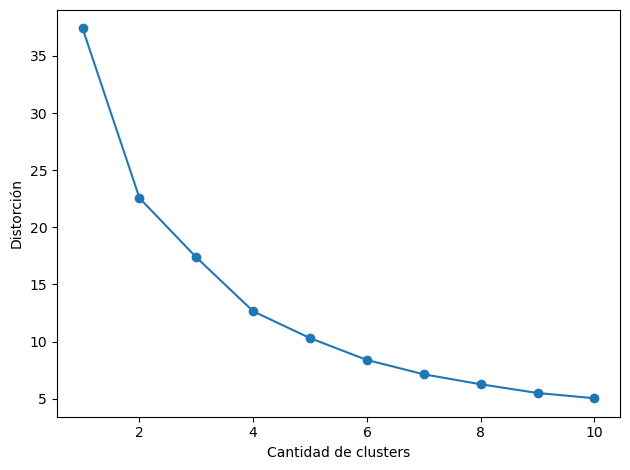

In [10]:
#1.1.2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#3 columnas
x = df_customer[['Age','Spending Score (1-100)','Annual Income (k$)']].values
#Estandarizar
scaler = MinMaxScaler()
x_std = scaler.fit_transform(x)
#num clasters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300,random_state=0)
    km.fit(x_std)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Distorción')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()


In [13]:
km = KMeans(n_clusters=6, init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y = km.fit_predict(x_std)

In [14]:
y

array([5, 1, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 5,
       3, 1, 2, 5, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5,
       2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 2, 5, 2, 2, 5, 2, 2, 5,
       5, 2, 2, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 5, 5, 4, 4, 5, 4, 0, 4, 0, 4, 0, 4,
       5, 4, 5, 4, 0, 4, 5, 4, 0, 4, 5, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 2, 4, 5, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [15]:
km.cluster_centers_

array([[0.4882134 , 0.17083608, 0.61237441],
       [0.13986014, 0.79962894, 0.08792846],
       [0.73717949, 0.49047619, 0.32185792],
       [0.56983806, 0.18367347, 0.10094909],
       [0.28605769, 0.82168367, 0.58278689],
       [0.15205725, 0.4439962 , 0.32691575]])

In [ ]:
#1.1.3
unsclaes_values = (km.cluster_centers_- scaler.min_ )/scaler.scale_

In [16]:
from PIL import Image 

In [18]:
#Lescura csv
df = pd.read_csv('./Clase17-databases/california-house-prices.csv')
workable_df = df.dropna()
print(workable_df.shape)
df.columns.values

(5751, 41)


array(['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Total spaces',
       'Garage spaces', 'Region', 'Elementary School',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School', 'Middle School Score', 'Middle School Distance',
       'High School', 'High School Score', 'High School Distance',
       'Flooring', 'Heating features', 'Cooling features',
       'Appliances included', 'Laundry features', 'Parking features',
       'Tax assessed value', 'Annual tax amount', 'Listed On',
       'Listed Price', 'Last Sold On', 'Last Sold Price', 'City', 'Zip',
       'State'], dtype=object)